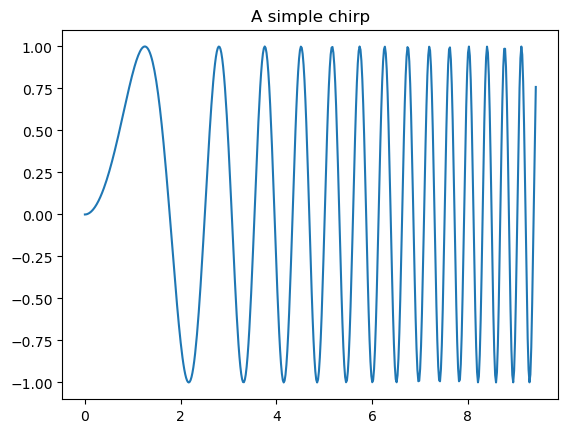

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp')
plt.show()

In [8]:
import pandas as pd

filepath = 'tearsheet-data.csv'

In [10]:
data = pd.read_csv(filepath, sep = ',', index_col = 0, header = 0, names = ['Date', 'Holdings', 'Cash', 'Total', 'Returns'])

In [11]:
data

,Holdings,Cash,Total,Returns
Date,,,,
1998-01-02,0.0,100000.000000,100000.000000,NaN
1998-01-02,0.0,100000.000000,100000.000000,0.0
1998-01-05,0.0,100000.000000,100000.000000,0.0
1998-01-06,0.0,100000.000000,100000.000000,0.0
1998-01-07,0.0,100000.000000,100000.000000,0.0
...,...,...,...,...
2008-12-26,0.0,149123.897819,149123.897819,0.0
2008-12-29,0.0,149123.897819,149123.897819,0.0
2008-12-30,0.0,149123.897819,149123.897819,0.0


In [13]:
data.index = pd.to_datetime(data.index)
data.head()

,Holdings,Cash,Total,Returns
Date,,,,
1998-01-02,0.0,100000.0,100000.0,NaN
1998-01-02,0.0,100000.0,100000.0,0.0
1998-01-05,0.0,100000.0,100000.0,0.0
1998-01-06,0.0,100000.0,100000.0,0.0
1998-01-07,0.0,100000.0,100000.0,0.0


In [22]:
data['Calculated'] = data['Total'].pct_change()
data['Calculated']

Date
1998-01-02    NaN
1998-01-02    0.0
1998-01-05    0.0
1998-01-06    0.0
1998-01-07    0.0
             ... 
2008-12-26    0.0
2008-12-29    0.0
2008-12-30    0.0
2008-12-31    0.0
2008-12-31    0.0
Name: Calculated, Length: 2769, dtype: float64

In [23]:
data['Test'] = data['Returns'] == data['Calculated']
data.loc[(~data.Test) & (data.index < '1998-06-02'), ['Returns', 'Calculated', 'Test']]

,Returns,Calculated,Test
Date,,,
1998-01-02,NaN,NaN,False
1998-05-29,-0.001088,-0.001088,False
1998-06-01,-0.000464,-0.000464,False


In [24]:
pd.set_option('display.precision', 20)

In [25]:
data.loc[(~data.Test) & (data.index < '1998-06-02'), ['Returns', 'Calculated', 'Test']]

,Returns,Calculated,Test
Date,,,
1998-01-02,NaN,NaN,False
1998-05-29,-0.00108791177048910004,-0.00108791177048916943,False
1998-06-01,-0.00046401169979250000,-0.00046401169979259915,False


In [30]:
import numpy as np
data['is_close'] = np.isclose(data.Returns, data.Calculated)

In [31]:
print(data.loc[~data.is_close])

            Holdings      Cash     Total  Returns  calculated   test   Test  \
Date                                                                          
1998-01-02       0.0  100000.0  100000.0      NaN         NaN  False  False   

            Calculated  IsClose  is_close  
Date                                       
1998-01-02         NaN    False     False  


In [33]:
data.drop(['Calculated','Test','IsClose'], axis = 1)

,Holdings,Cash,Total,Returns,calculated,test,is_close
Date,,,,,,,
1998-01-02,0.0,100000.00000000000000000000,100000.00000000000000000000,NaN,NaN,False,False
1998-01-02,0.0,100000.00000000000000000000,100000.00000000000000000000,0.0,0.0,True,True
1998-01-05,0.0,100000.00000000000000000000,100000.00000000000000000000,0.0,0.0,True,True
1998-01-06,0.0,100000.00000000000000000000,100000.00000000000000000000,0.0,0.0,True,True
1998-01-07,0.0,100000.00000000000000000000,100000.00000000000000000000,0.0,0.0,True,True
...,...,...,...,...,...,...,...
2008-12-26,0.0,149123.89781930879689753056,149123.89781930879689753056,0.0,0.0,True,True
2008-12-29,0.0,149123.89781930879689753056,149123.89781930879689753056,0.0,0.0,True,True
2008-12-30,0.0,149123.89781930879689753056,149123.89781930879689753056,0.0,0.0,True,True


In [38]:
data['Equity'] = (1 + data['Returns']).cumprod()
pd.set_option('display.precision', 6)
data.loc[data['Equity'] > 1, ['Cash', 'Returns', 'Equity']]

,Cash,Returns,Equity
Date,,,
1998-06-09,96563.548970,0.001251,1.000950
1998-06-10,96563.548970,-0.000240,1.000710
1998-06-11,96563.548970,-0.000311,1.000399
1998-06-12,96563.548970,0.000387,1.000786
1998-06-15,96563.548970,-0.000775,1.000011
...,...,...,...
2008-12-26,149123.897819,0.000000,1.491239
2008-12-29,149123.897819,0.000000,1.491239
2008-12-30,149123.897819,0.000000,1.491239


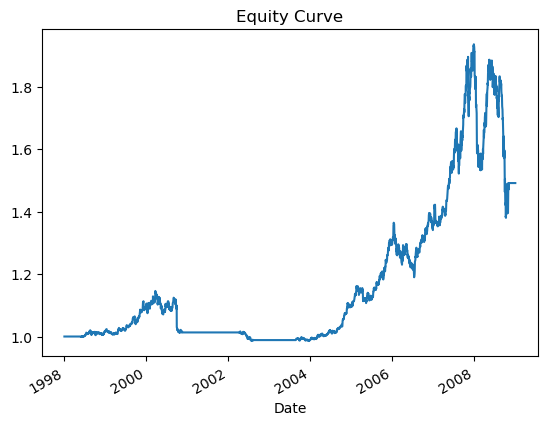

In [39]:
data['Equity'].plot(title = 'Equity Curve')
plt.show()